<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/Trabalho_Final_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless

In [7]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


<IPython.core.display.Javascript object>

Saved to photo.jpg


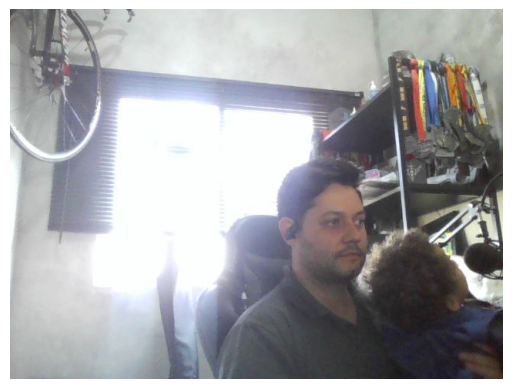

In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import PIL
from io import BytesIO
import matplotlib.pyplot as plt

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

filename = take_photo()
print('Saved to {}'.format(filename))

# Mostrar a imagem capturada
img = cv2.imread(filename)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Explicação do código:
Importação das bibliotecas: cv2 (OpenCV) é usada para captura e processamento de imagens. cv2_imshow do módulo google.colab.patches é utilizado para exibir imagens no Colab.

Carregamento do classificador de faces: cv2.CascadeClassifier é usado para carregar o classificador Haar cascades pré-treinado para detecção de faces.

Captura de vídeo da webcam: cv2.VideoCapture(0) inicializa a captura de vídeo da webcam.

Loop principal: O loop lê frames da webcam, converte-os para escala de cinza, detecta faces e desenha retângulos ao redor das faces detectadas.

Exibição dos frames: cv2_imshow exibe os frames com as faces detectadas no Colab.

Encerramento: cap.release() e cv2.destroyAllWindows() liberam a captura da webcam e fecham todas as janelas quando o loop é encerrado.

Para executar esse código no Colab, você precisa garantir que a permissão de acesso à webcam esteja habilitada. Ao rodar o código, a célula do Colab pedirá permissão para acessar a webcam do seu notebook.

In [4]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Carregar o classificador pré-treinado para detecção de faces
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Capturar vídeo da webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Erro ao abrir a webcam.")
else:
    while True:
        # Ler um frame da webcam
        ret, frame = cap.read()

        if not ret:
            print("Erro ao capturar frame.")
            break

        # Converter o frame para escala de cinza
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detectar faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Desenhar retângulos ao redor das faces detectadas
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Mostrar o frame com as faces detectadas
        cv2_imshow(frame)

        # Sair do loop ao pressionar a tecla 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Liberar a captura da webcam e fechar todas as janelas
cap.release()
cv2.destroyAllWindows()

Erro ao abrir a webcam.


In [5]:
from IPython.display import display, Javascript, HTML

HTML('''
<video autoplay playsinline id="video" width="640" height="480"></video>
<script>
  const video = document.getElementById('video');
  navigator.mediaDevices.getUserMedia({ video: true }).then((stream) => {
    video.srcObject = stream;
  });
</script>
''')


In [9]:
import cv2
import numpy as np
import mediapipe as mp

# Inicializa o reconhecimento facial com mediapipe
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

# Função para capturar frames da webcam e processar
def capture_and_process_video():
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Converte o frame para RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(image)

        # Desenha as detecções faciais no frame
        if results.detections:
            for detection in results.detections:
                mp_drawing.draw_detection(frame, detection)

        # Exibe o frame processado
        cv2.imshow('Video', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

capture_and_process_video()


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


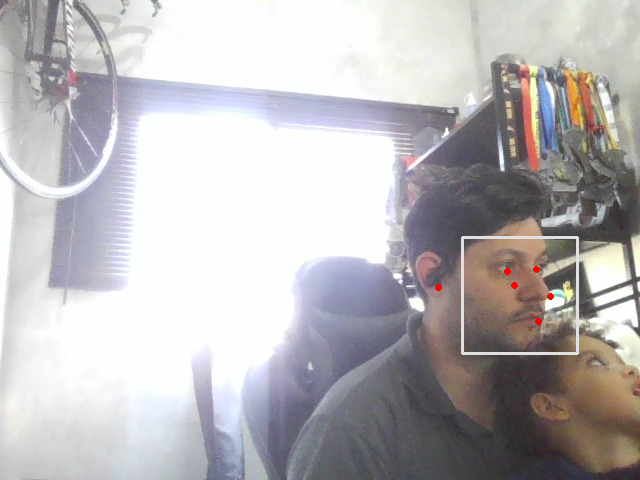

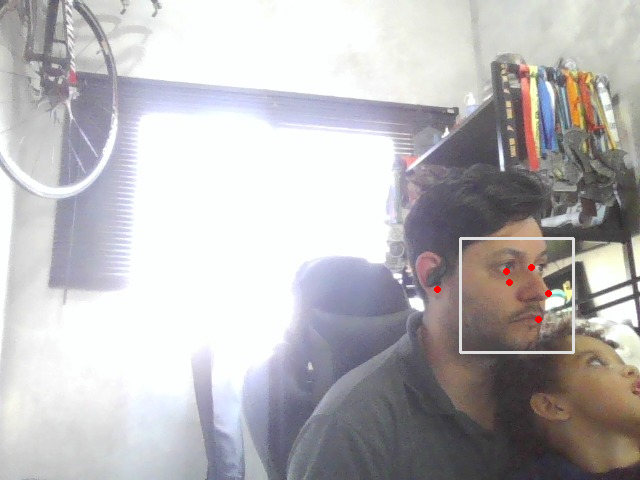

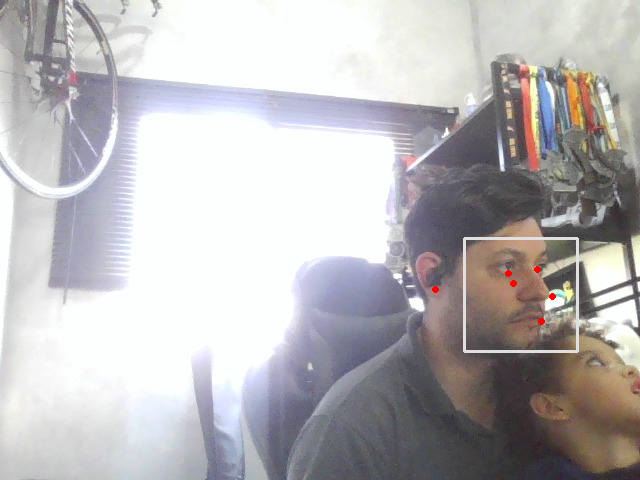

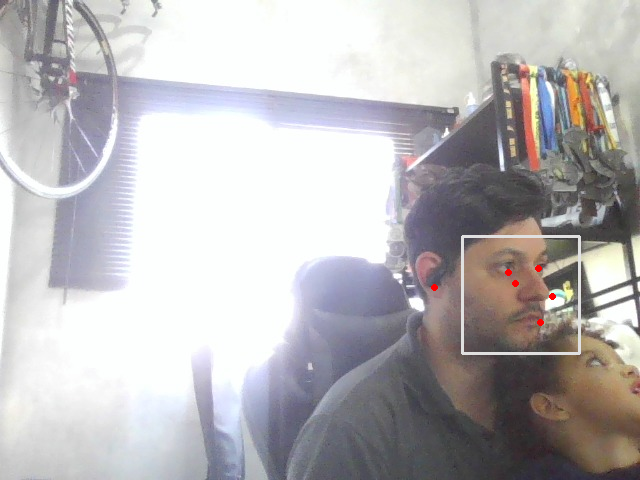

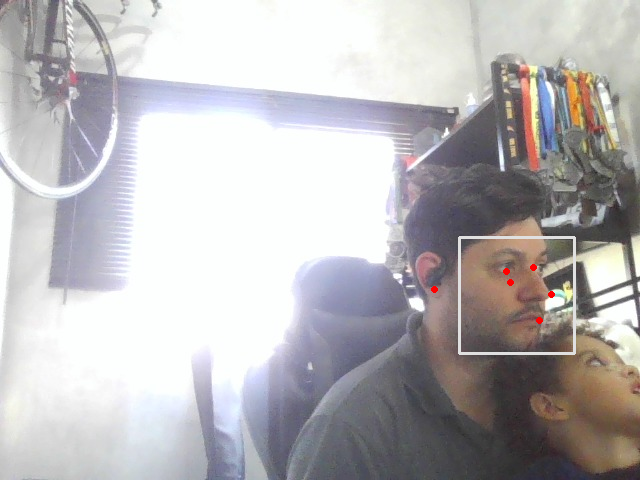

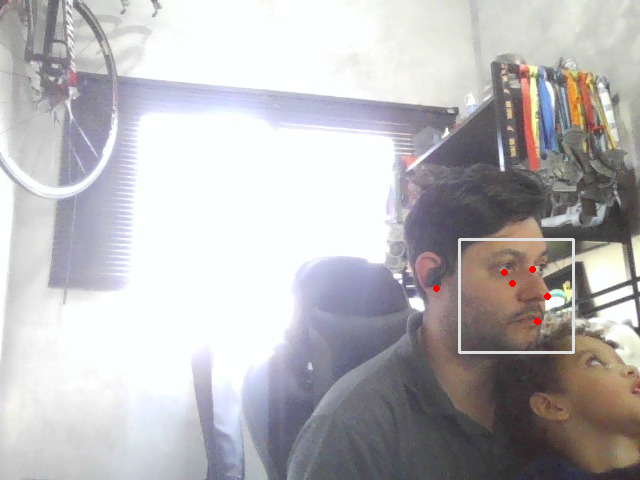

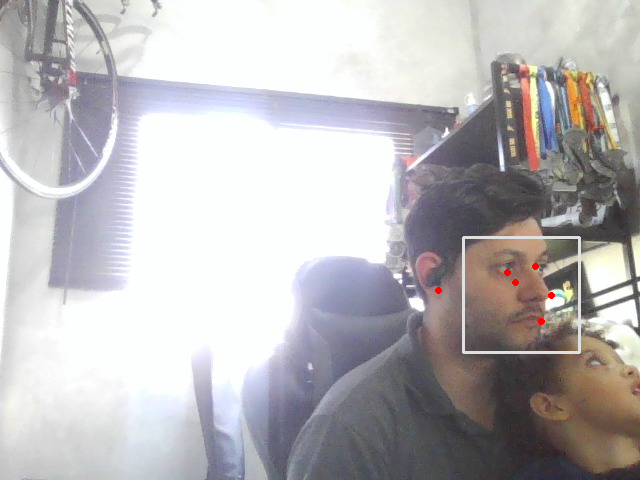

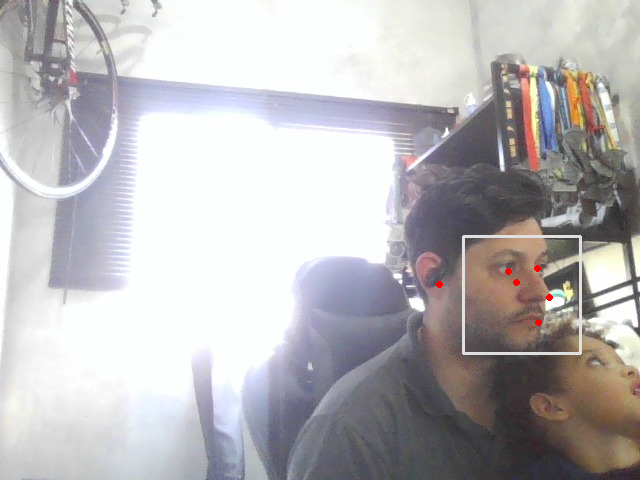

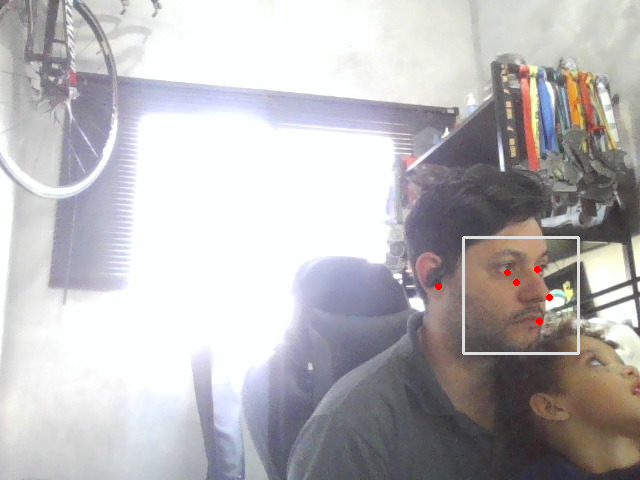

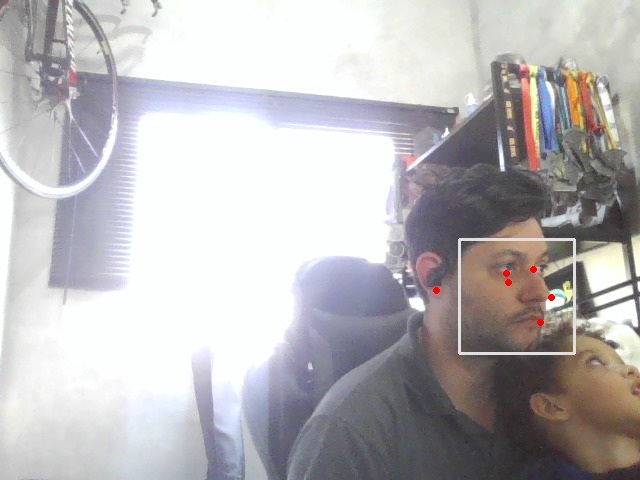

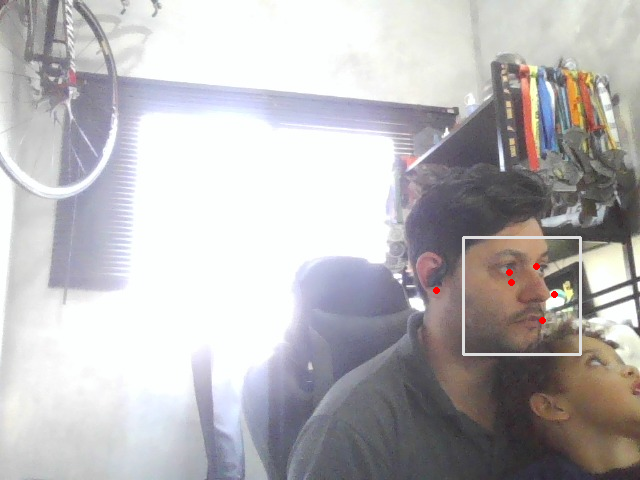

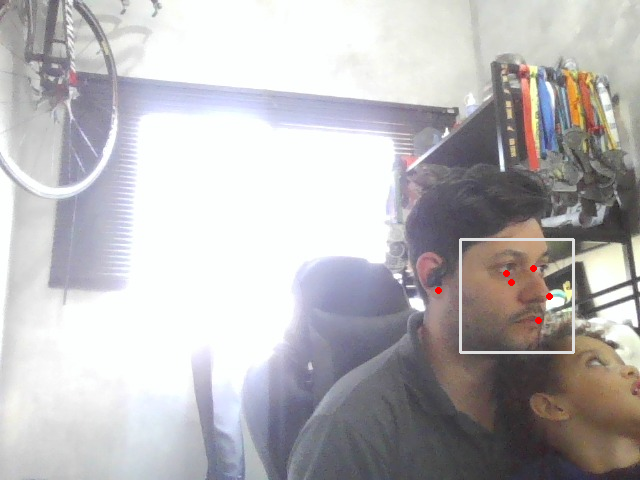

In [10]:
from IPython.display import display, Javascript

def start_video_stream():
    display(Javascript('''
        async function setupCamera() {
            const video = document.createElement('video');
            video.style.display = 'none';
            document.body.appendChild(video);
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await new Promise((resolve) => (video.onloadedmetadata = resolve));
            video.play();
            return video;
        }

        async function captureFrame() {
            const video = await setupCamera();
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            const context = canvas.getContext('2d');
            context.drawImage(video, 0, 0, canvas.width, canvas.height);
            const data = canvas.toDataURL('image/jpeg');
            google.colab.kernel.invokeFunction('notebook.get_frame', [data], {});
            requestAnimationFrame(captureFrame);
        }

        captureFrame();
    '''))

start_video_stream()


In [11]:
import cv2
import numpy as np
import mediapipe as mp
from google.colab.patches import cv2_imshow
import IPython.display as display

# Inicializa o reconhecimento facial com mediapipe
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

# Função para processar frames
def process_frame(data):
    # Decodifica a imagem
    image_data = data.split(",")[1]
    image = np.frombuffer(base64.b64decode(image_data), dtype=np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    # Converte a imagem para RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Processa a imagem para detecção facial
    results = face_detection.process(rgb_image)

    # Desenha as detecções faciais na imagem
    if results.detections:
        for detection in results.detections:
            mp_drawing.draw_detection(image, detection)

    # Exibe a imagem processada
    cv2_imshow(image)

# Registro da função para receber frames
from google.colab import output
import base64

output.register_callback('notebook.get_frame', process_frame)
